In [1]:
import pandas as pd
import requests

In [2]:
url = "http://files.grouplens.org/datasets/movielens/ml-100k/u.item"

In [3]:
response = requests.get(url)
response.raise_for_status()

In [4]:
with open("u.item", "wb") as file:
    file.write(response.content)

In [5]:
data = pd.read_csv("u.item", sep="|", encoding="latin-1")

In [6]:
data.head()

,1,Toy Story (1995),01-Jan-1995,Unnamed: 3,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0.1,0.2,1.1,1.2,...,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15
0,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
columns = [
    "movie_id", "movie_title", "release_date", "video_release_date",
    "IMDb_URL", "unknown", "Action", "Adventure", "Animation", 
    "Children's", "Comedy", "Crime", "Documentary", "Drama", 
    "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
    "Romance", "Sci-Fi", "Thriller", "War", "Western"
]

In [51]:
data = pd.read_csv("u.item", sep="|",names=columns, encoding="latin-1")

In [52]:
data.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


hierarchical cluster

In [53]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [65]:
clusters = data[data.columns[5:]]
clusters.head()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [66]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   unknown      1682 non-null   int64
 1   Action       1682 non-null   int64
 2   Adventure    1682 non-null   int64
 3   Animation    1682 non-null   int64
 4   Children's   1682 non-null   int64
 5   Comedy       1682 non-null   int64
 6   Crime        1682 non-null   int64
 7   Documentary  1682 non-null   int64
 8   Drama        1682 non-null   int64
 9   Fantasy      1682 non-null   int64
 10  Film-Noir    1682 non-null   int64
 11  Horror       1682 non-null   int64
 12  Musical      1682 non-null   int64
 13  Mystery      1682 non-null   int64
 14  Romance      1682 non-null   int64
 15  Sci-Fi       1682 non-null   int64
 16  Thriller     1682 non-null   int64
 17  War          1682 non-null   int64
 18  Western      1682 non-null   int64
dtypes: int64(19)
memory usage: 249.8 KB


In [67]:
linkage_matrix = linkage(clusters, method='ward')

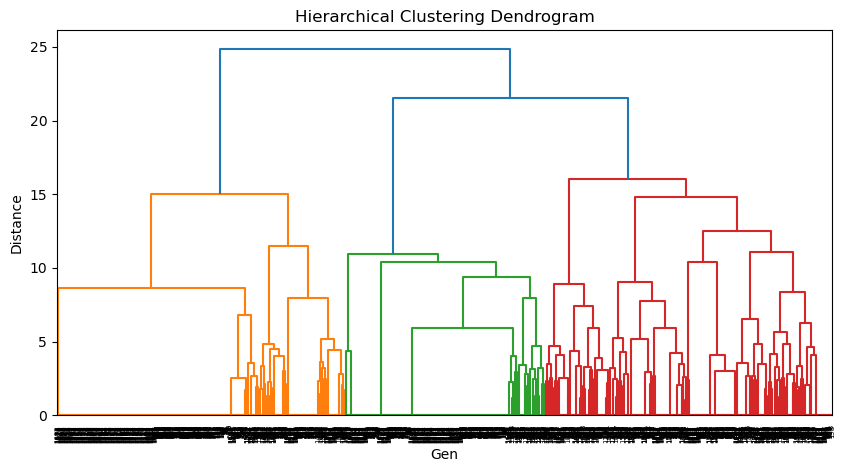

In [68]:
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=range(1, len(data) + 1))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Gen")
plt.ylabel("Distance")
plt.show()

In [69]:
max_d = 10  
clustersNo = fcluster(linkage_matrix, max_d, criterion='distance')

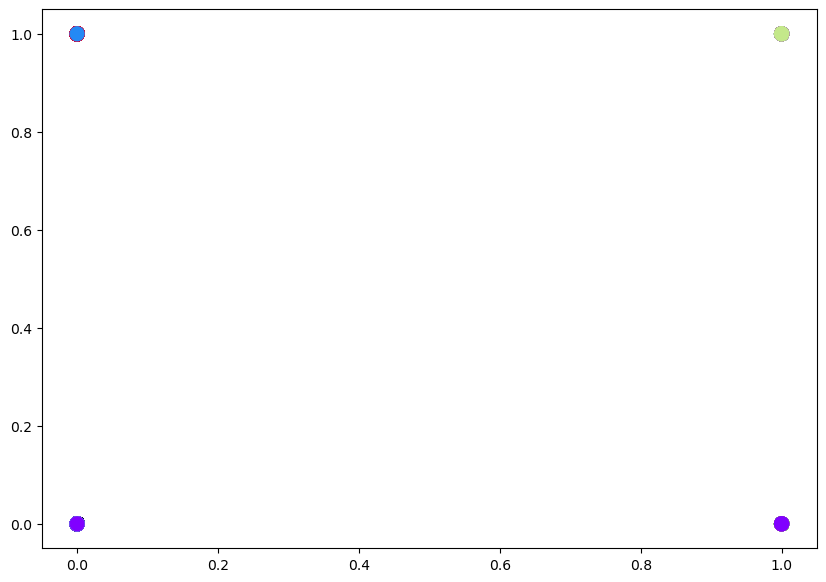

In [70]:
plt.figure(figsize=(10, 7))
#plt.scatter(clusters[:,0], clusters[:,1], c=clusters, cmap='rainbow', s=100)
plt.scatter(clusters['Action'], clusters['Thriller'], c=clustersNo, cmap='rainbow', s=100)
plt.show()

In [76]:
df = pd.DataFrame(clusters, columns = [
    "movie_id", "movie_title", "release_date", "video_release_date",
    "IMDb_URL", "unknown", "Action", "Adventure", "Animation", 
    "Children's", "Comedy", "Crime", "Documentary", "Drama", 
    "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
    "Romance", "Sci-Fi", "Thriller", "War", "Western"])
df['Cluster'] = clustersNo

In [77]:
cluster_dict = {}
clusters_dict = df.groupby('Cluster')['movie_title'].apply(list).to_dict()

In [79]:
for cluster, movies in clusters_dict.items():
    print(f"Cluster {cluster}:")
    for movie in movies:
        print(f"  - {movie}")
    print()

Cluster 1:
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - nan
  - n